In [1]:
%matplotlib notebook

In [2]:
import ROOT
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/09


In [3]:
f = TFile("selectedEventsTrueRecoBoth_withTrkDir_wuthTrackComp_102824.root","READ") # with track completeness score
#f = TFile("selectedEventsTrueRecoBoth_withTrkDir_102824.root","READ") 

t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

10913


In [4]:
recoSel_recoMomPi_list = []
recoSel_recoMomMu_list = []
recoSel_recoMomP_list = []

recoSel_trkDirPiX_list = []
recoSel_trkDirPiY_list = []
recoSel_trkDirPiZ_list = []
recoSel_trkDirMuX_list = []
recoSel_trkDirMuY_list = []
recoSel_trkDirMuZ_list = []
recoSel_trkDirPX_list = []
recoSel_trkDirPY_list = []
recoSel_trkDirPZ_list = []

weights_list = []

completeness = 0.5

for e in range(entries):

    t.GetEntry(e)
    
    if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection
        
        if (t.recoSel_trackCompMu_ > completeness) and (t.recoSel_trackCompPi_ > completeness) and (t.recoSel_trackCompP_ > completeness):
    
            recoSel_recoMomMu_list.append(t.recoSel_recoMomMu_)
            recoSel_recoMomPi_list.append(t.recoSel_recoMomPi_)
            recoSel_recoMomP_list.append(t.recoSel_recoMomP_)

            recoSel_trkDirPiX_list.append(t.recoSel_trkDirPiX_)
            recoSel_trkDirPiY_list.append(t.recoSel_trkDirPiY_)
            recoSel_trkDirPiZ_list.append(t.recoSel_trkDirPiZ_)
            recoSel_trkDirMuX_list.append(t.recoSel_trkDirMuX_)
            recoSel_trkDirMuY_list.append(t.recoSel_trkDirMuY_)
            recoSel_trkDirMuZ_list.append(t.recoSel_trkDirMuZ_)
            recoSel_trkDirPX_list.append(t.recoSel_trkDirPiX_)
            recoSel_trkDirPY_list.append(t.recoSel_trkDirPiY_)
            recoSel_trkDirPZ_list.append(t.recoSel_trkDirPiZ_)

            weights_list.append(t.weight_)
        

recoPiMom_arr = np.asarray(recoSel_recoMomPi_list)
recoMuMom_arr = np.asarray(recoSel_recoMomMu_list)
recoLPMom_arr = np.asarray(recoSel_recoMomP_list)

weights_arr = np.asarray(weights_list)

In [5]:
# POT scaling for events that passed reco only

targetPOT = 1.3e21
sumPOT = 4.68e20 # this is for run 1
#sumPOT = 8.98e20 # this is for run 3

scale = targetPOT / sumPOT
print("Scale is: ", scale)

print(np.sum(weights_arr))
totalEvents = np.sum(weights_arr)*scale
print("totalEvents: ", totalEvents)

Scale is:  2.7777777777777777
1865.703280743481
totalEvents:  5182.509113176336


<IPython.core.display.Javascript object>


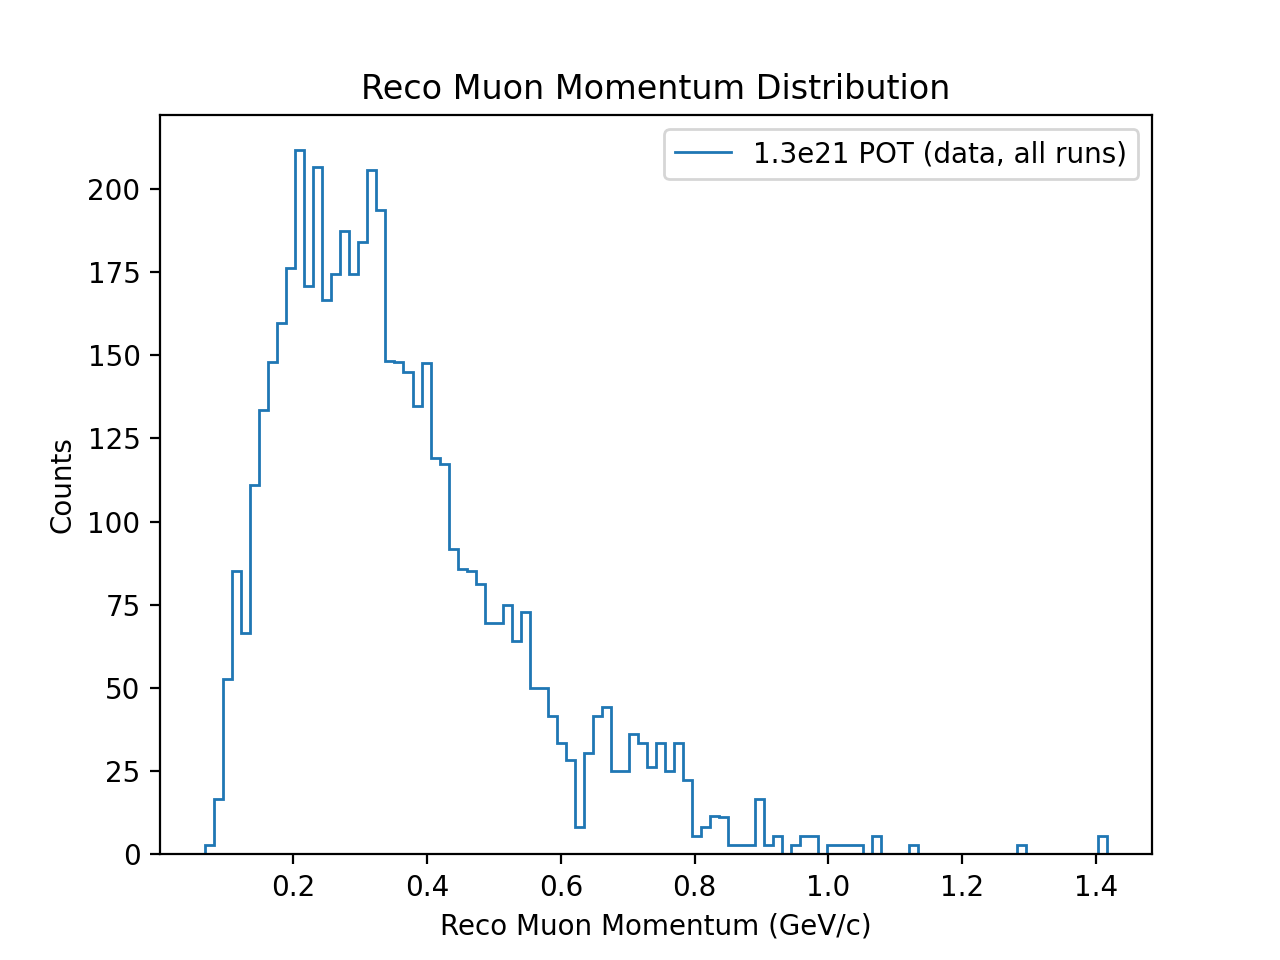

In [6]:
# reco muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(recoMuMom_arr, bins=100, weights=weights_arr)
scaledCounts = counts*scale


plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


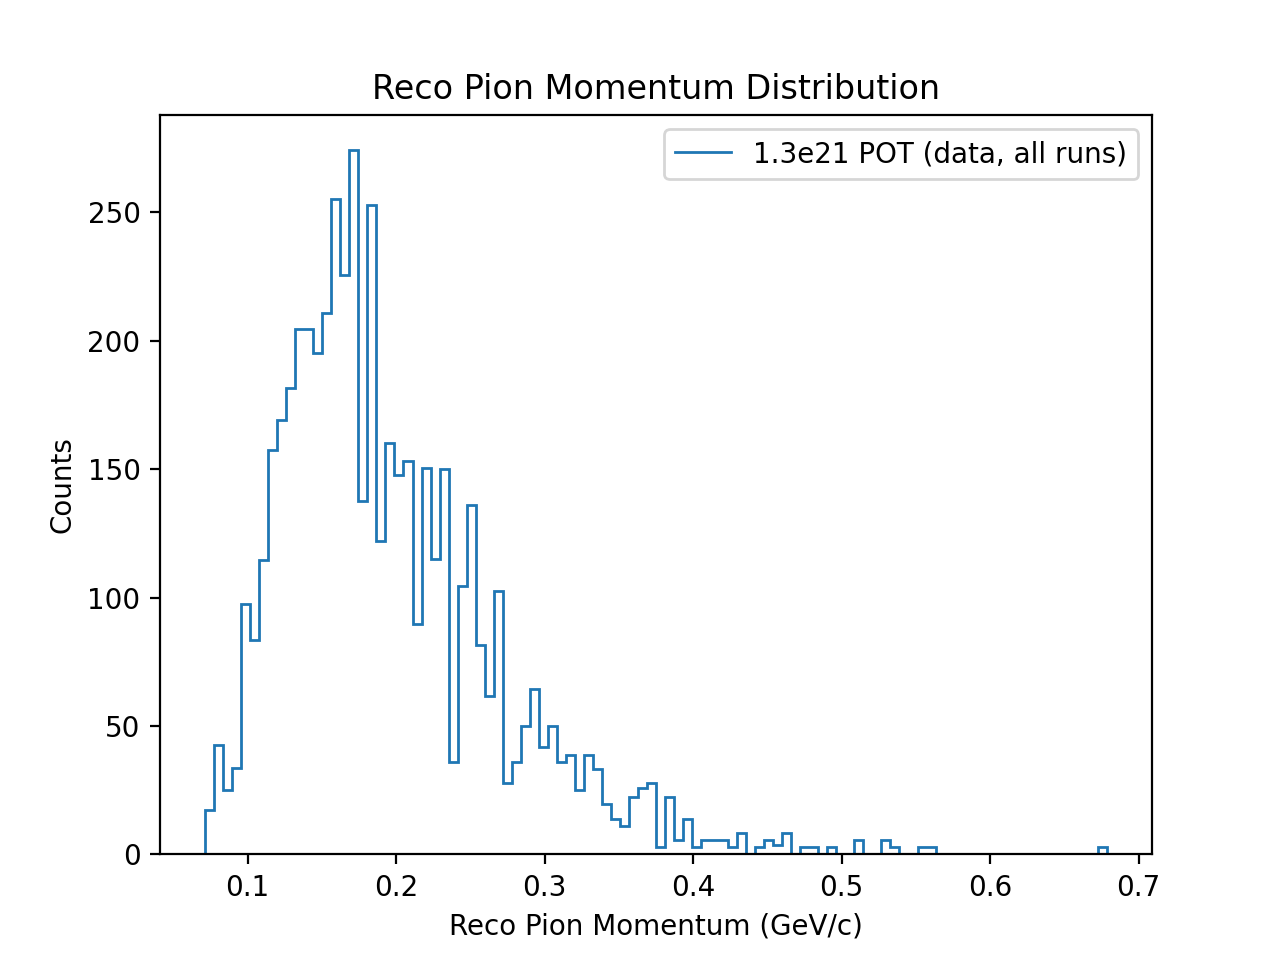

In [7]:
# reco pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(recoPiMom_arr, bins=100, weights=weights_arr)
scaledCounts = counts*scale


plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


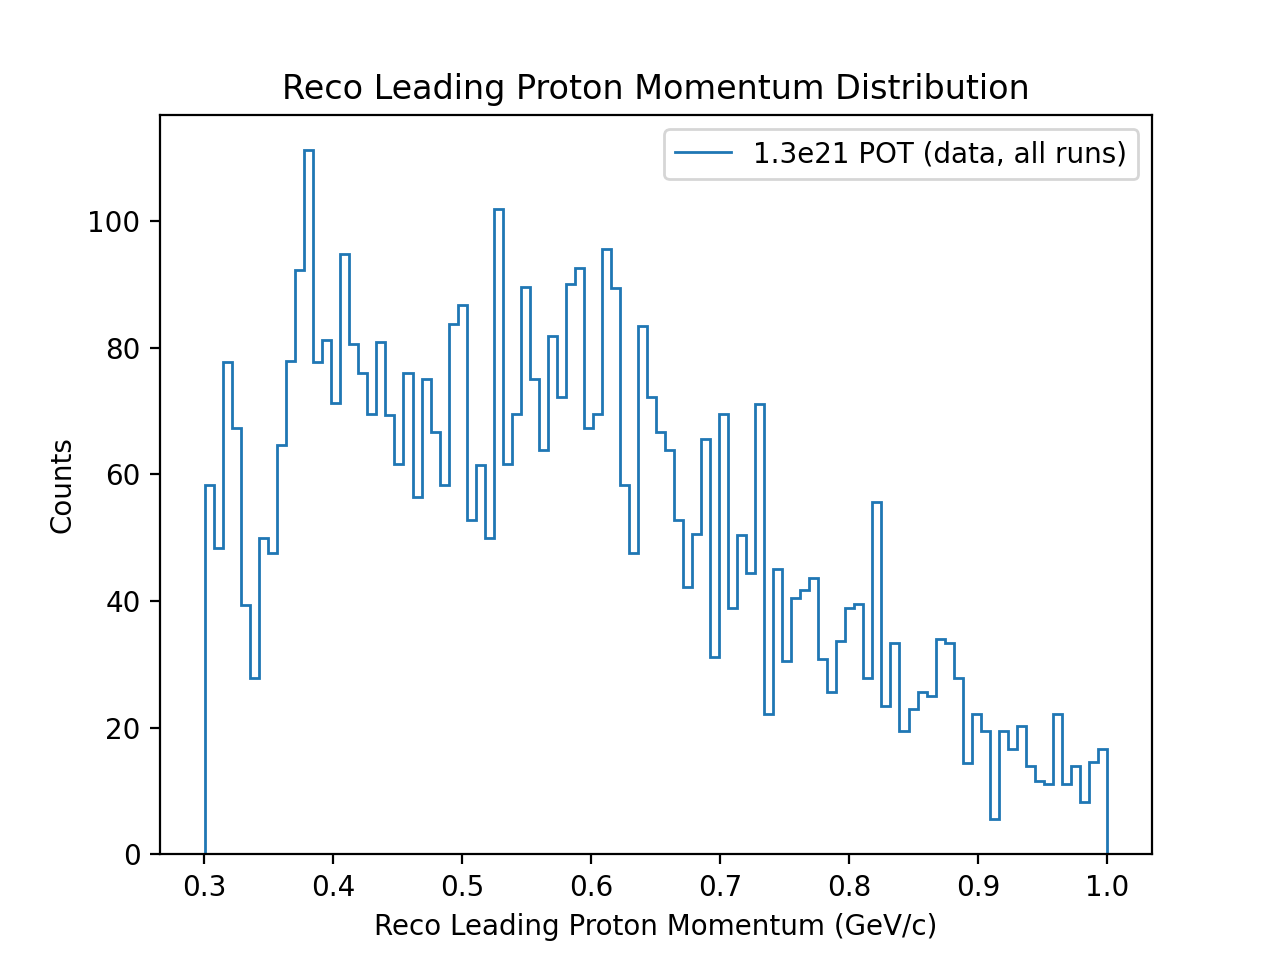

In [8]:
# reco leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(recoLPMom_arr, bins=100, weights=weights_arr)
scaledCounts = counts*scale


plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)